In [1]:
# Import universal packages:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import time
from matplotlib import animation
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
import time
import matplotlib.animation as animation
from scipy.optimize import curve_fit

#import GameOfCloud
from GameOfCloud import *
#import Plotting_GameOfCloud
from EnsembleRuns_GameOfCloud import *
from Plotting_GameOfCloud import *

# The model

# Run DIU and plot

In [2]:
ndays = 7

x, Tns, counter,trop_temp_saved = gameofcloud(ndays, DIU=True, persistence='yes', branching=False, Tns_branch=False)


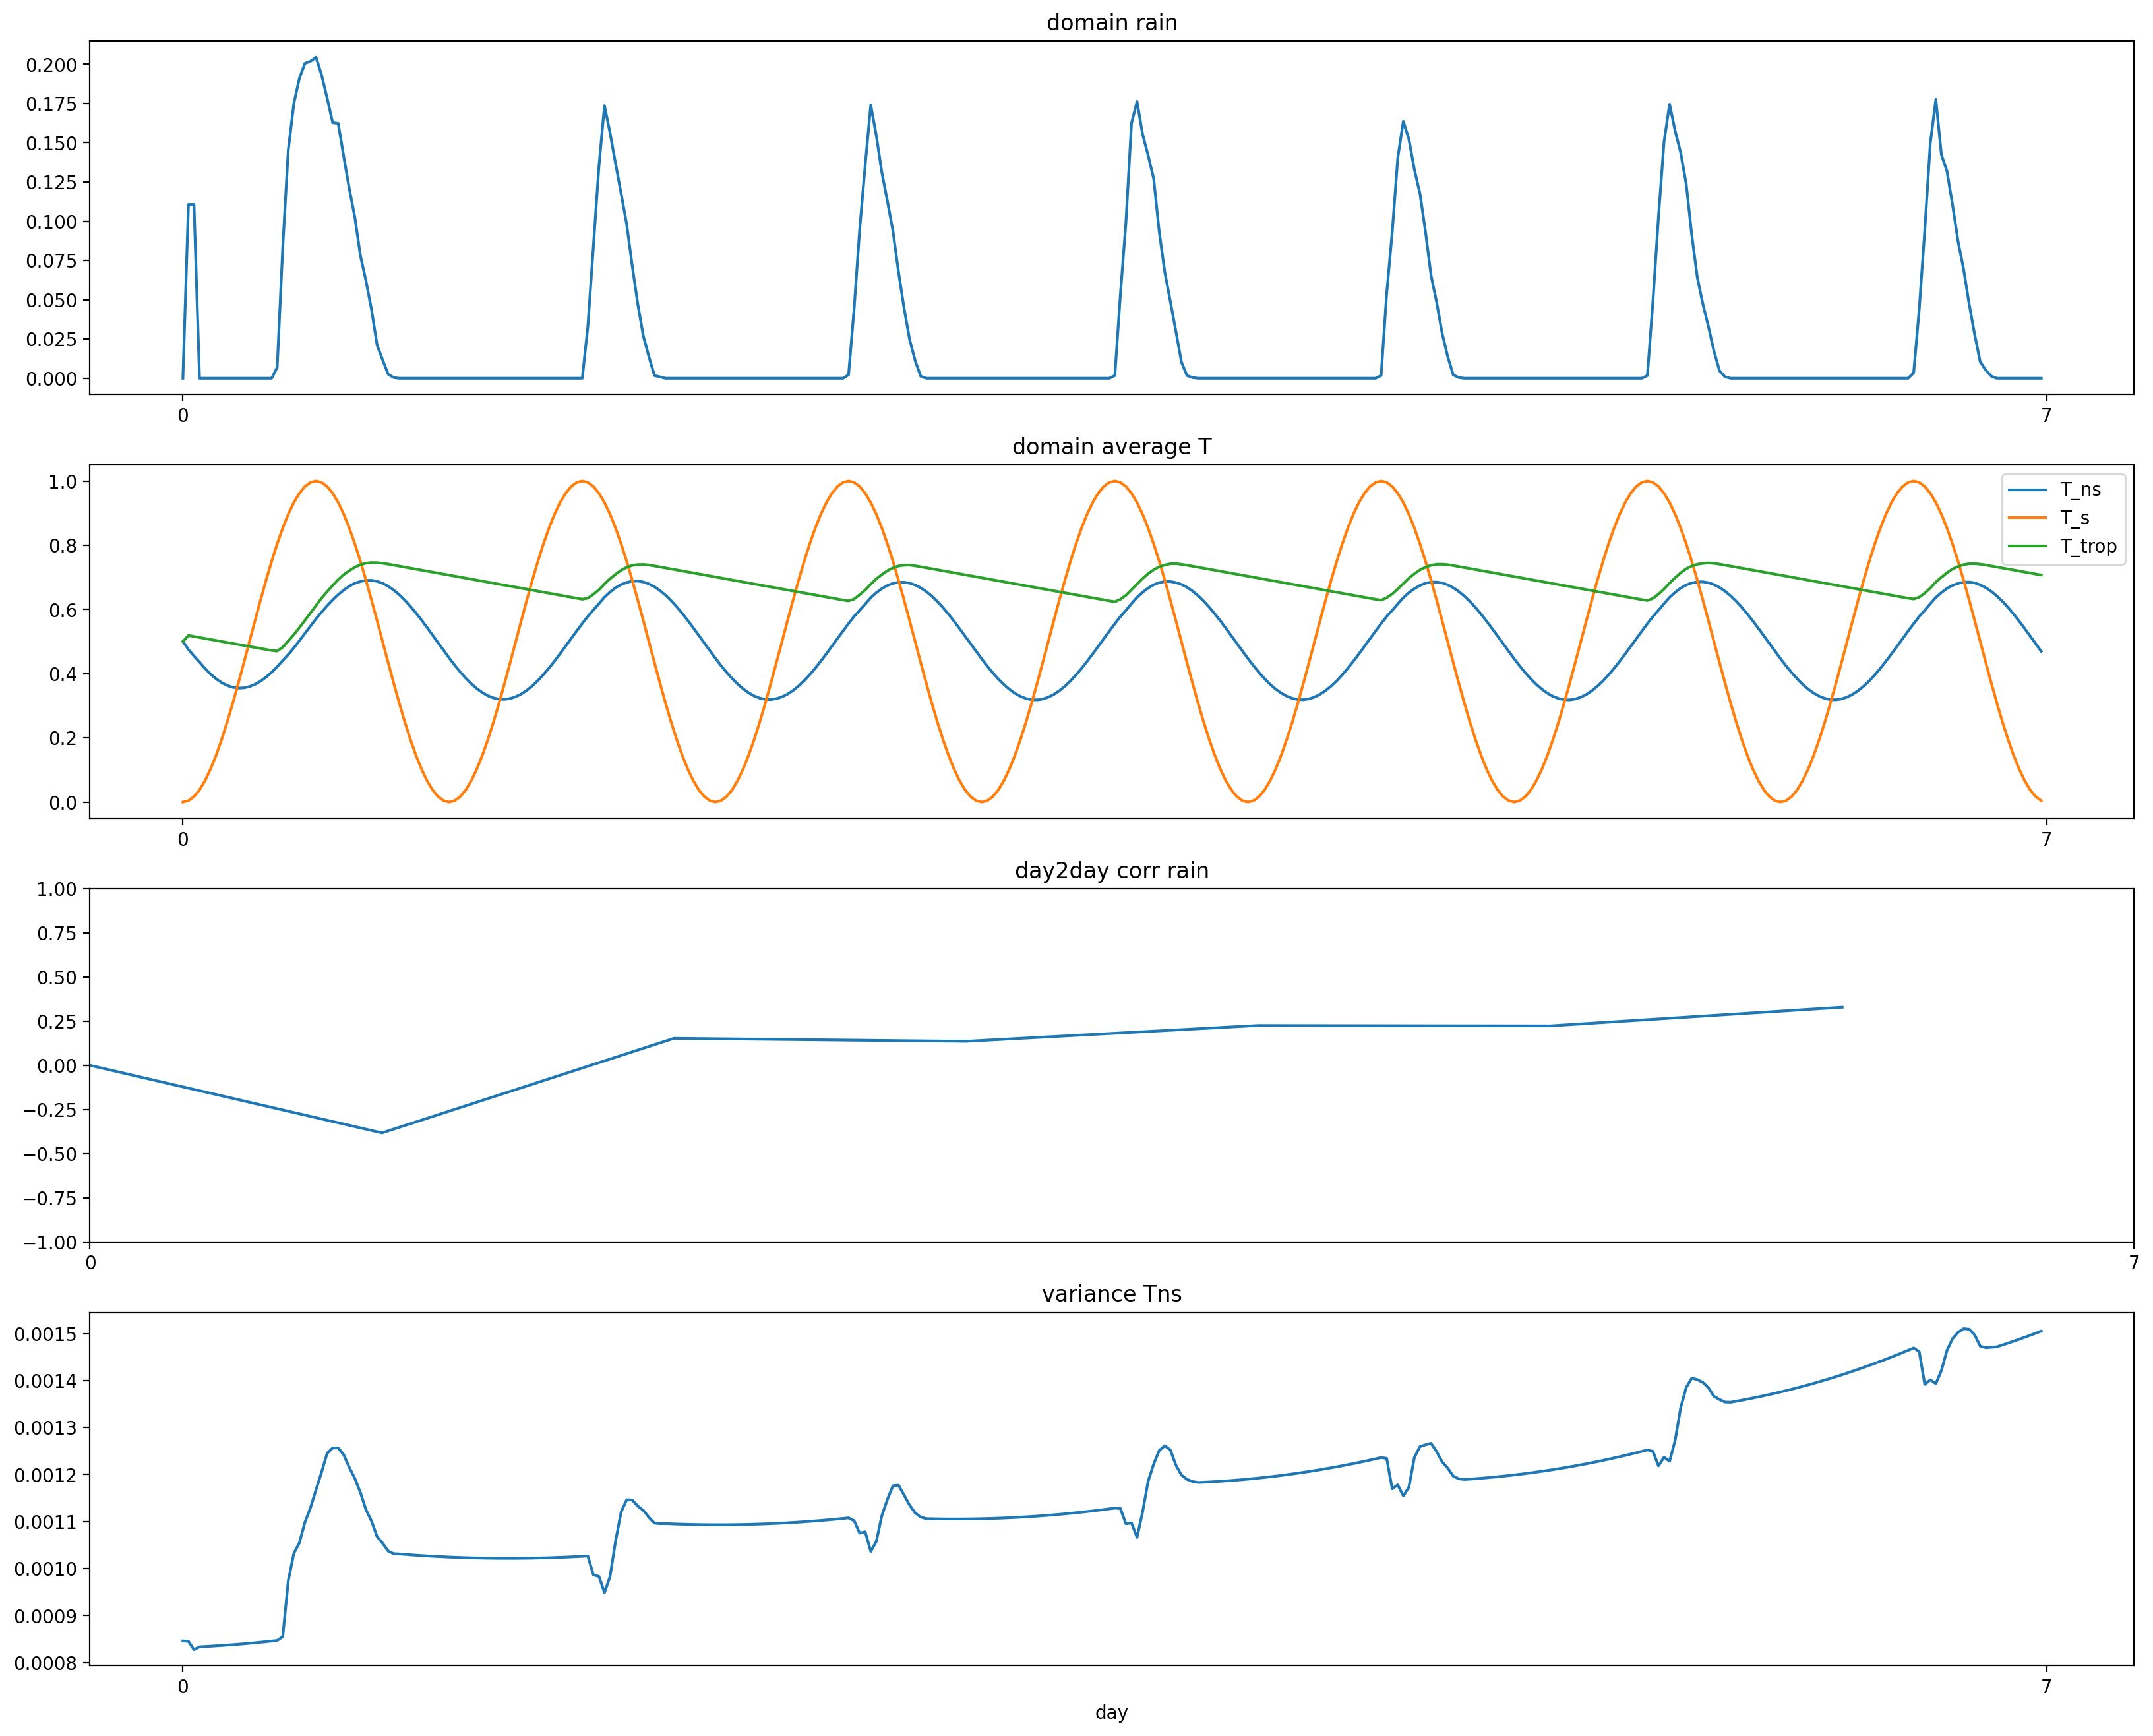

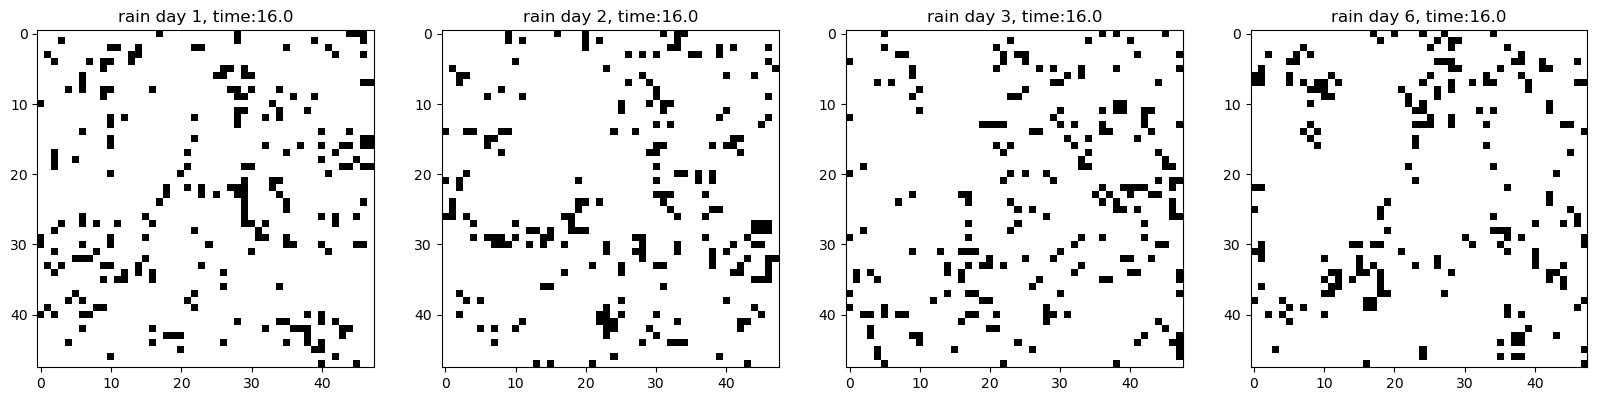

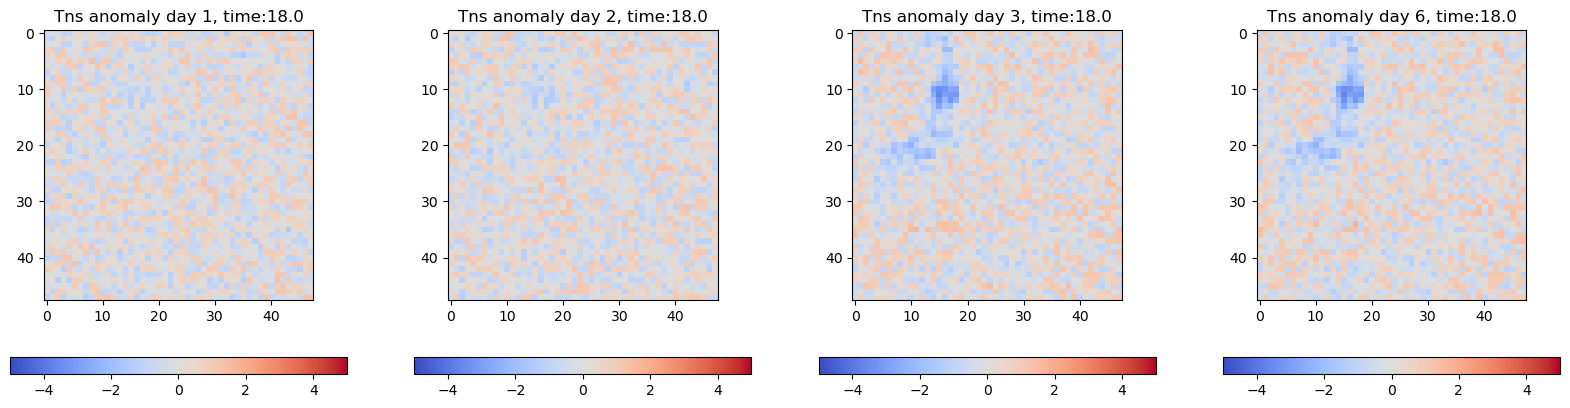

In [3]:
N_steps_day = 48
plot_gameofcloud(True, N_steps_day, ndays, Tns, x, trop_temp_saved)

# Run OCEAN and plot


In [4]:
%matplotlib inline
ndays_ocean = 7
x_ocean, Tns_ocean, counter_ocean, trop_temp_saved_ocean = gameofcloud(ndays_ocean, DIU=False,persistence='yes', branching=False, Tns_branch=False) 

# set branching=True and Tns_branch=Tns[-1] to branch from last step of DIU

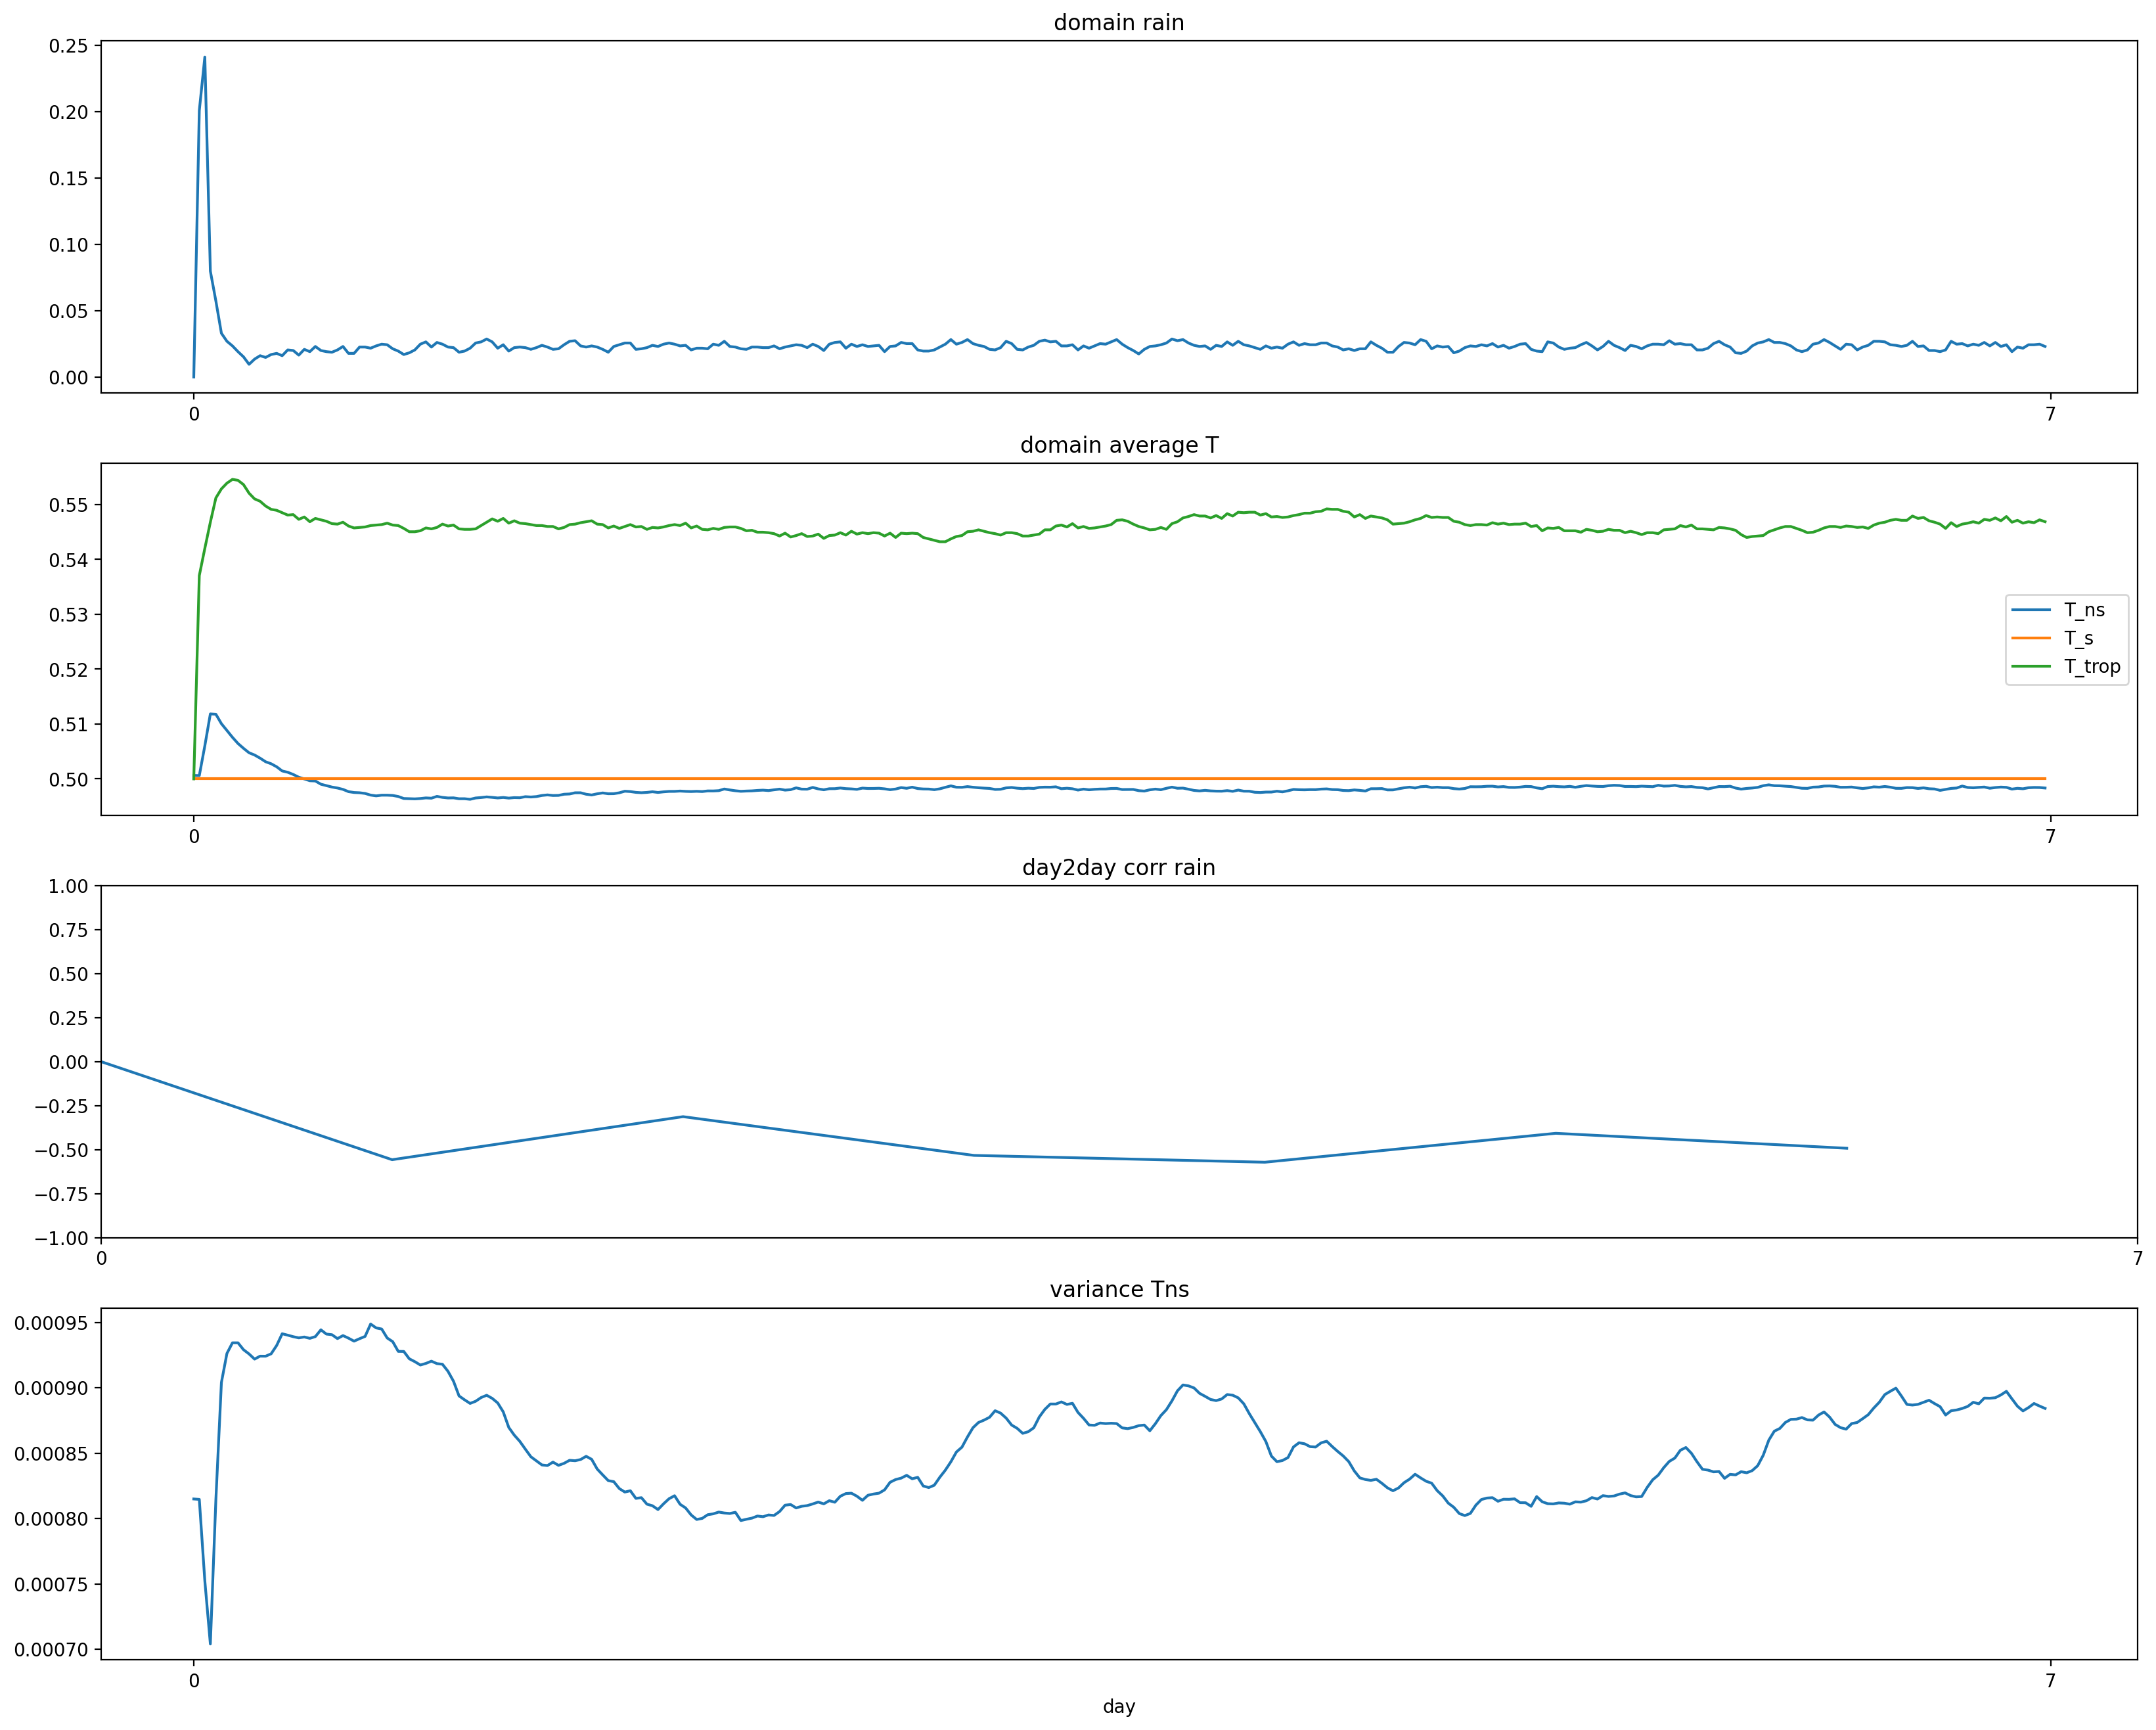

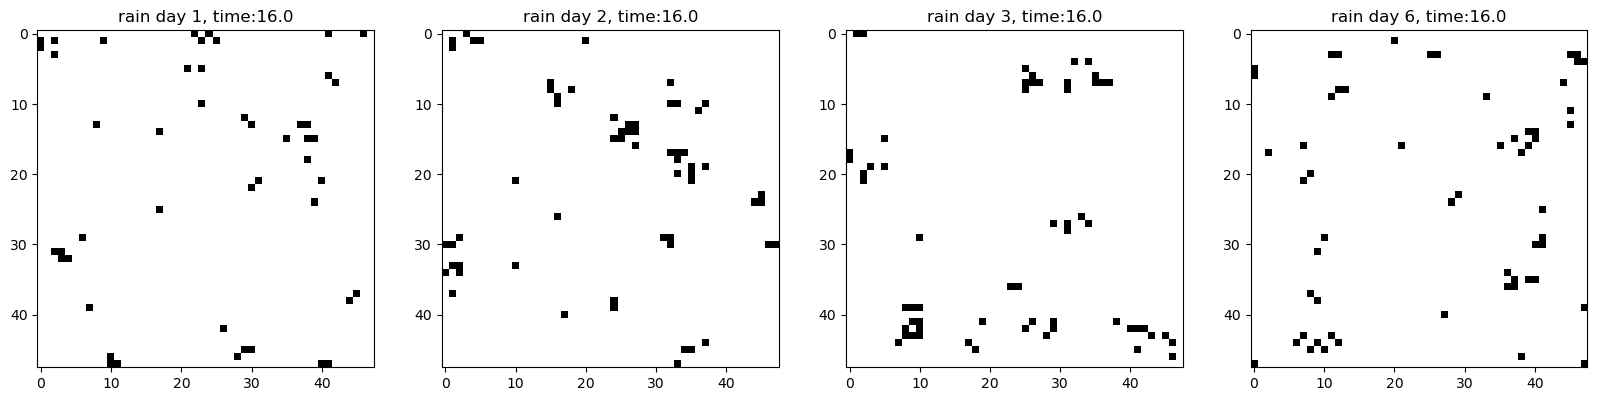

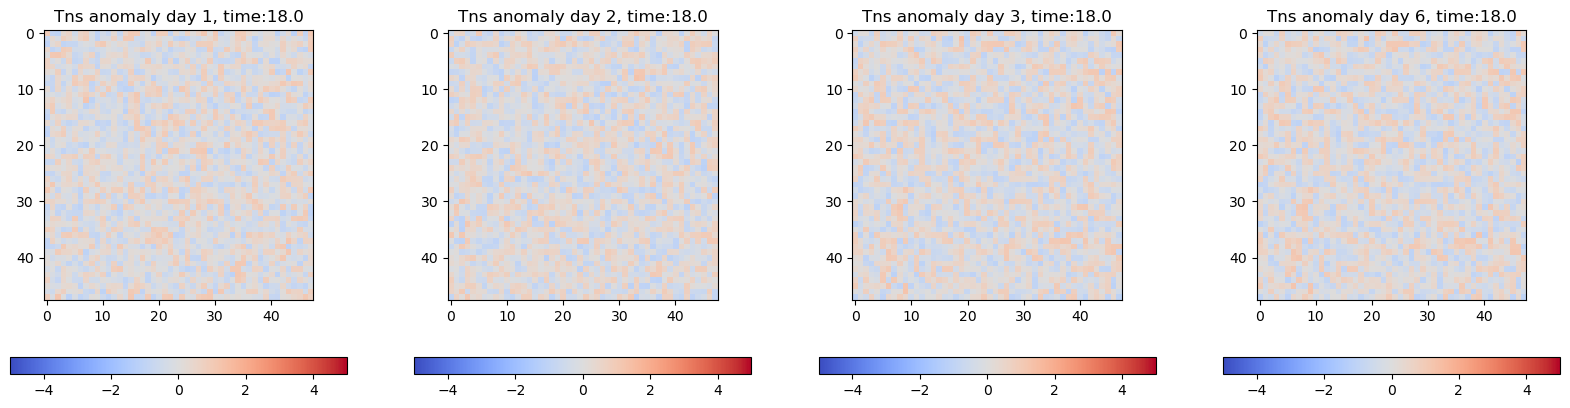

In [5]:
plot_gameofcloud(False, N_steps_day, ndays_ocean, Tns_ocean, x_ocean, trop_temp_saved_ocean)

# Run ensemble of DIU + OCEAN + OCEAN branches, and plot

## NOTE: takes a while to run

In [6]:
ensemble_runs = 10
days1 = 28
days2 = 42
ndays              = days1 + days2
ndays_ocean        = days1 + days2
ndays_oceanBRANCH  = days2
daybranch1         = 3
daybranch2          = 28

(x, Tns, 
 x_ocean, Tns_ocean, 
 x_oceanBRANCH1, Tns_oceanBRANCH1, 
 x_oceanBRANCH2, Tns_oceanBRANCH2,
 diu, diu_std,
 ocean, ocean_std, 
 branch1, branch1_std, 
 branch2, branch2_std, 
 diu_var, diu_var_std, 
 ocean_var, ocean_var_std, 
 branch1_var, branch1_var_std, 
 branch2_var, branch2_var_std) = ensemble_gameofcloud(ensemble_runs,days1,days2,daybranch1,daybranch2)

finished


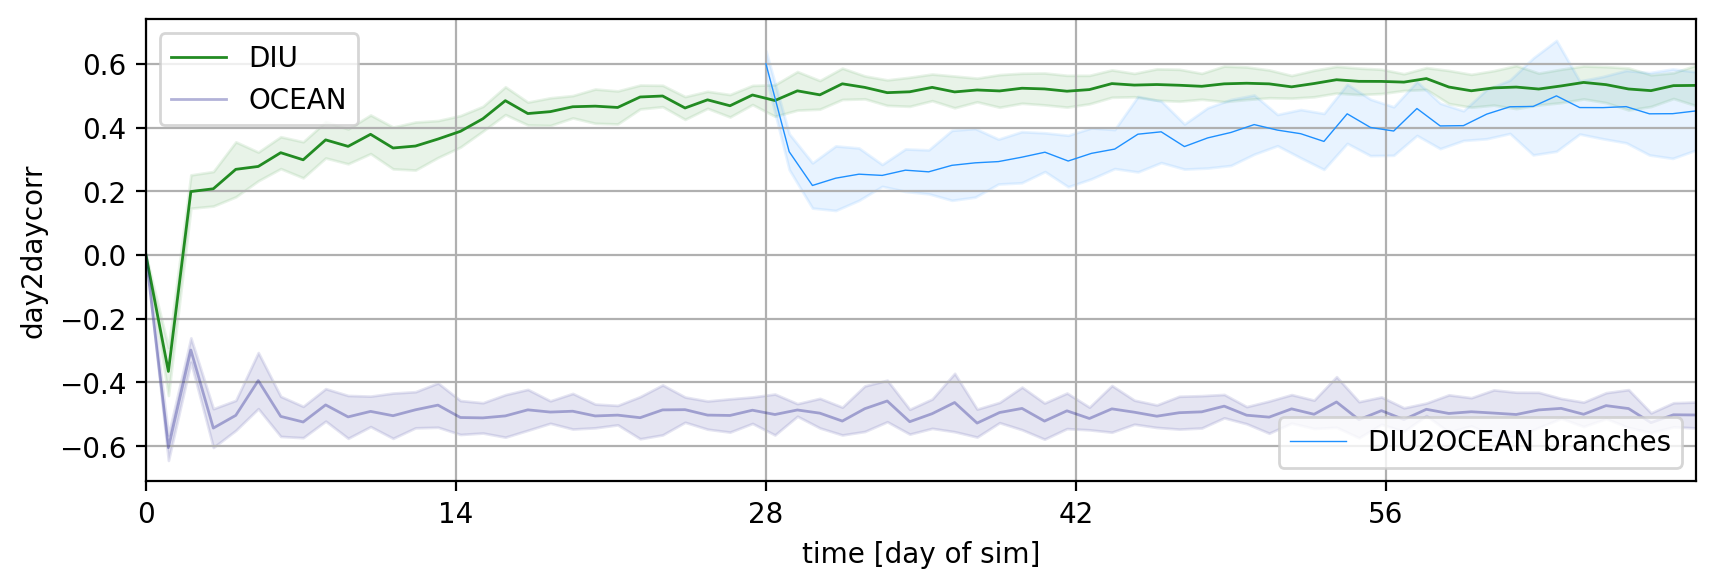

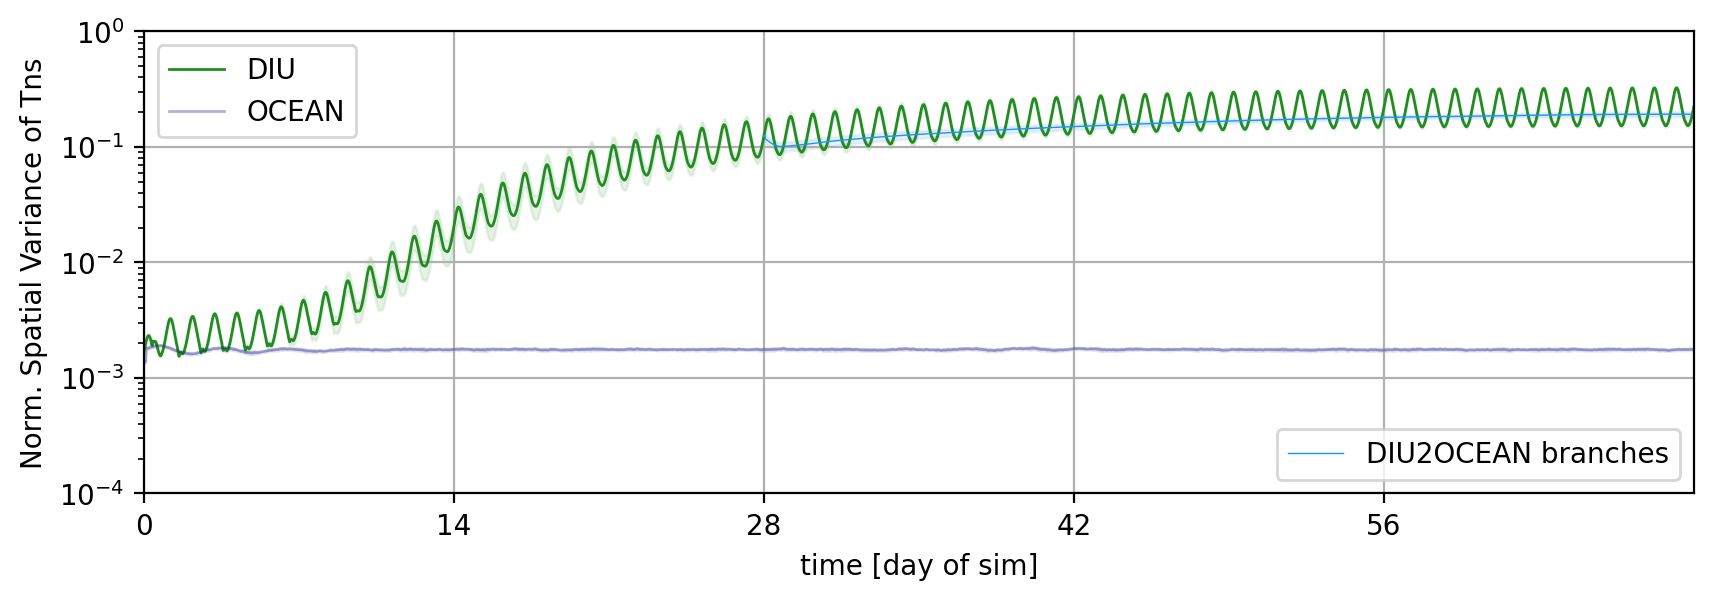

In [7]:

plot_branches_all_spread(diu, diu_std, ocean, ocean_std, branch1, branch1_std, branch2, branch2_std, 
                         'day2daycorr', days1, days2, daybranch1=daybranch1, daybranch2=daybranch2, spread='yes', log='no')

plot_branches_all_spread(diu_var[::], diu_var_std[::], ocean_var[::], ocean_var_std[::], branch1_var[::], branch1_var_std[::], branch2_var[::], branch2_var_std[::], 
                         'Norm. Spatial Variance of Tns', days1, days2, daybranch1=daybranch1, daybranch2=daybranch2, spread='yes', log='yes')



<Figure size 640x480 with 0 Axes>

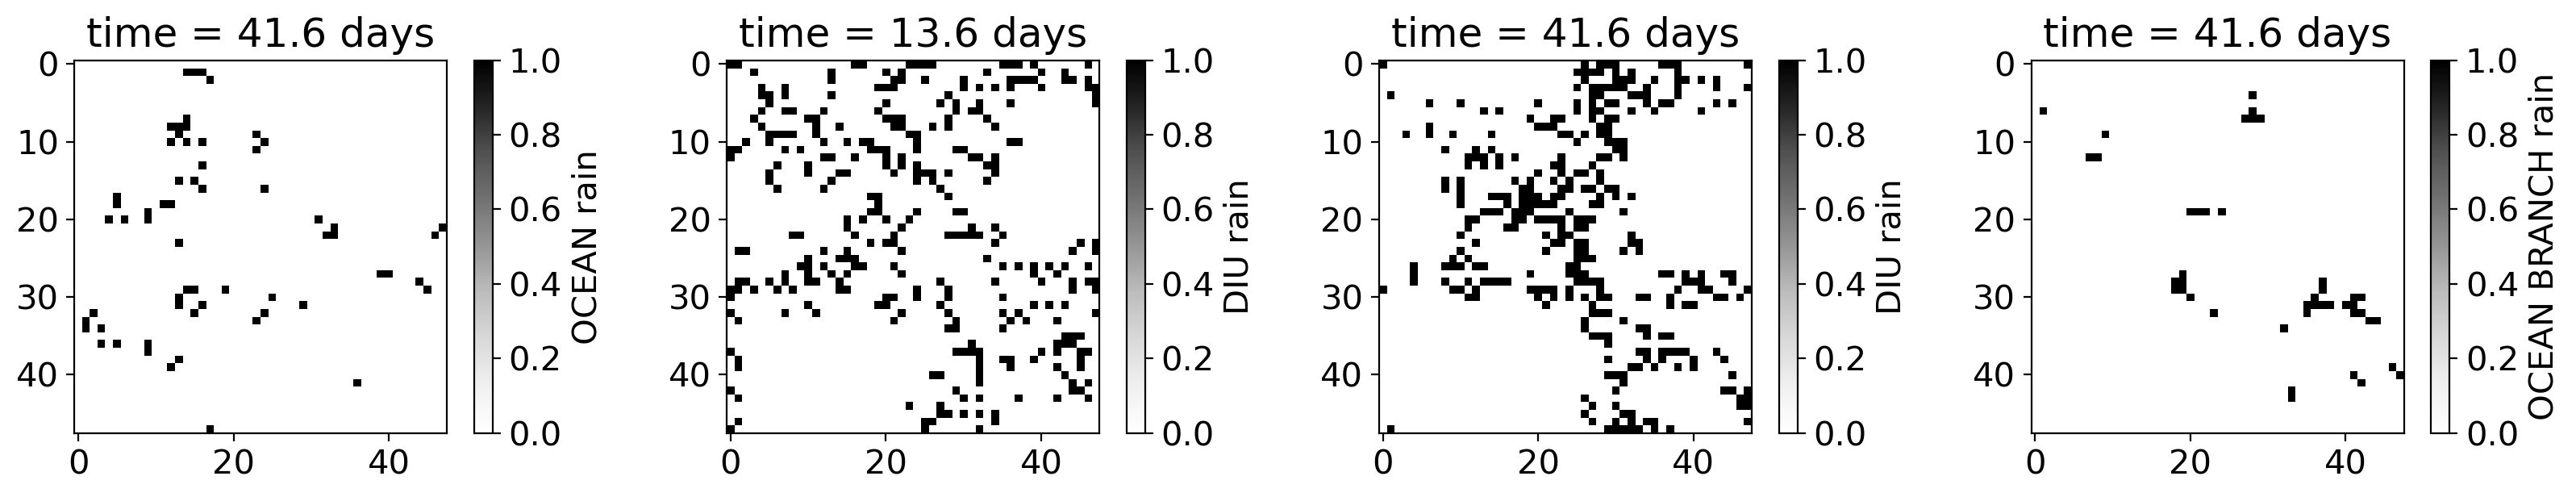

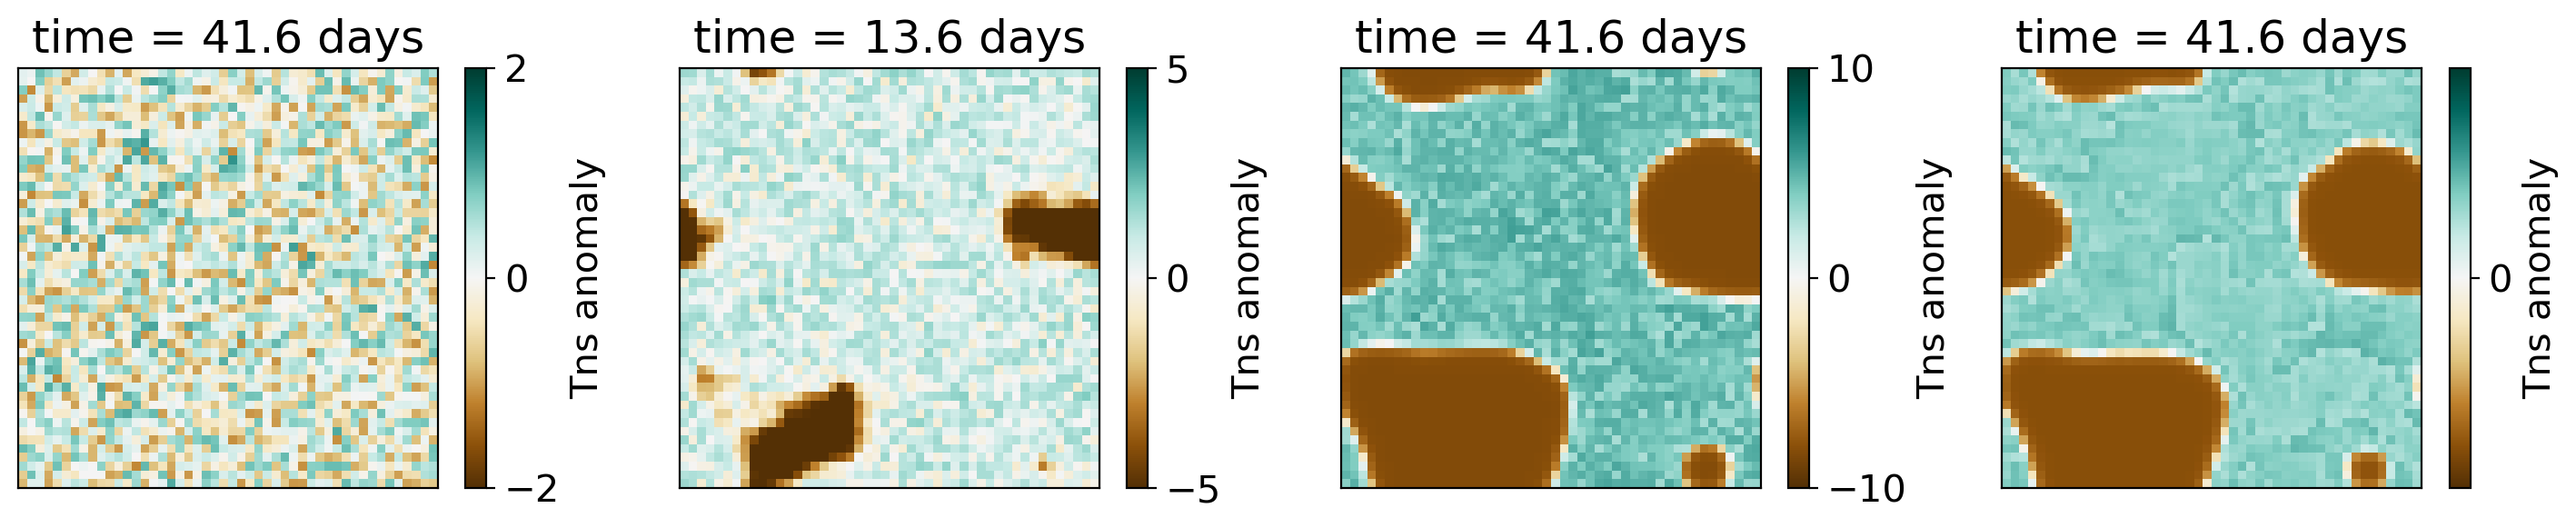

In [8]:
plotdayOCEAN = 41
plotdayDIU = 13
plotdayBRANCH2 = 41
plotdayDIU_2 = 41

%run EnsembleRuns_GameOfCloud.py
plot_snapshots(x,Tns,
               x_ocean,Tns_ocean,
               x_oceanBRANCH2,Tns_oceanBRANCH2, 
               daybranch2,
               plotdayOCEAN, plotdayDIU, 
               plotdayBRANCH2, plotdayDIU_2)

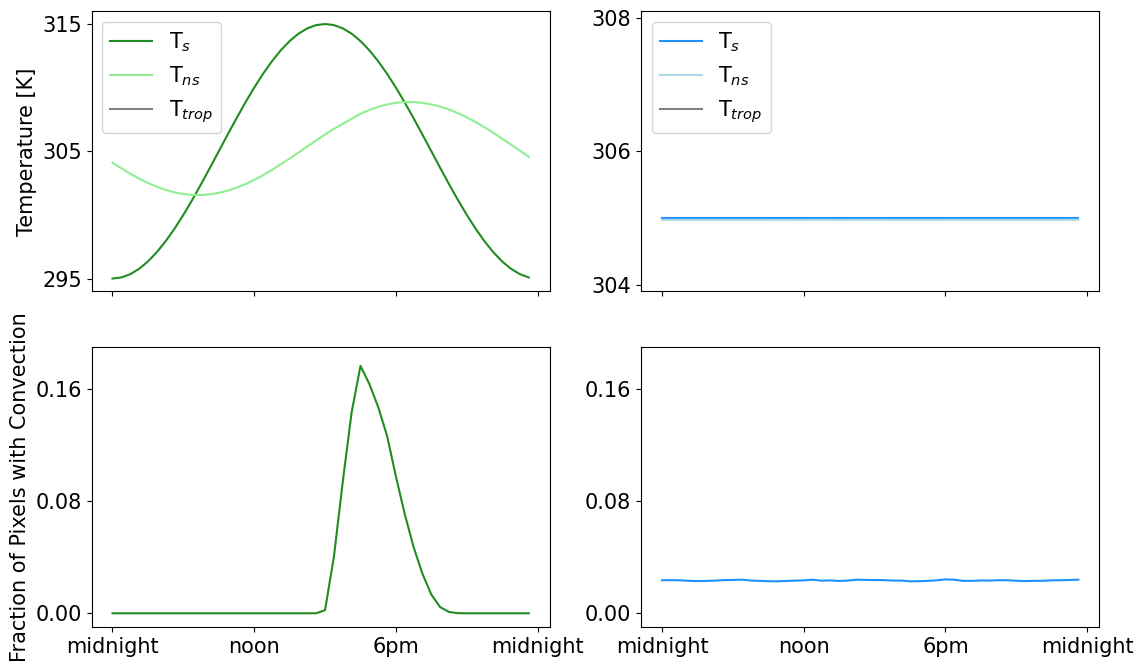

In [13]:
plot_diurnalcycle(x, Tns, trop_temp_saved, x_ocean, Tns_ocean, trop_temp_saved_ocean)

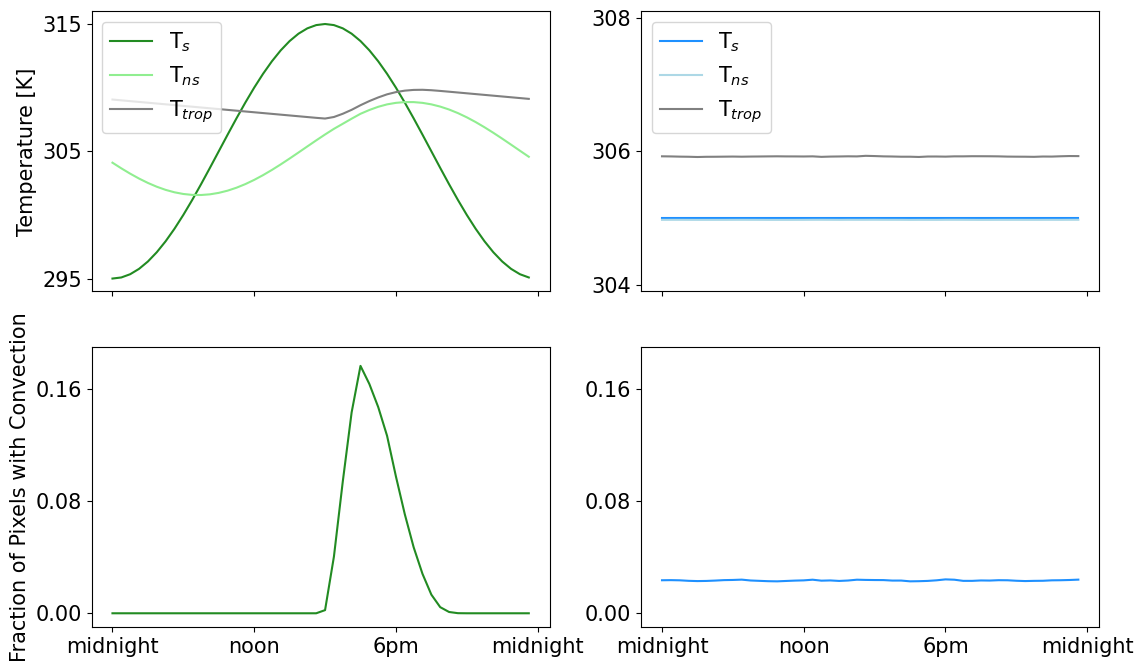

In [26]:
fig, axs = plt.subplots(2,2, figsize=(13,8), dpi=100, sharex=True)

Tns_timeseries=295+20*np.mean(Tns[7*48:], axis=(1,2))

axs[0, 0].plot(295+20*Ts(np.arange(0,48),48,True), label='T$_s$', color='forestgreen')
axs[0, 0].plot(np.mean(Tns_timeseries.reshape(-1, 48), axis=0), label='T$_{ns}$', color='lightgreen')
axs[0, 0].plot(np.mean(295+20*trop_temp_saved[1*48:14*48].reshape(-1,48), axis=0), label='T$_{trop}$',color='grey')
axs[0, 0].set_ylabel('Temperature [K]')


axs[0, 0].set_yticks(np.linspace(295, 315, 3))
axs[0, 0].legend(loc=2)


rain_timeseries=np.mean(x, axis=(1,2))
axs[1, 0].plot(np.mean(rain_timeseries[7*48:].reshape(-1, 48), axis=0), color='forestgreen')

axs[1, 0].set_ylabel('Fraction of Pixels with Convection')
axs[1, 0].set_xticks(np.linspace(0,48,4))
axs[1, 0].set_xticklabels(['midnight', 'noon', '6pm', 'midnight'])
axs[1, 0].set_ylim(-0.01,0.19)

axs[1, 0].set_yticks(np.linspace(0, 0.16, 3))

Tns_timeseries_ocean=295+20*np.mean(Tns_ocean[7*48:], axis=(1,2))
axs[0, 1].plot(295+20*Ts(np.arange(0,48),48,False)*np.ones(48), label='T$_s$', color='dodgerblue')
axs[0, 1].plot(np.mean(Tns_timeseries_ocean.reshape(-1, 48), axis=0), label='T$_{ns}$', color='lightblue')
axs[0, 1].plot(np.mean(295+20*trop_temp_saved_ocean[1*48:14*48].reshape(-1,48), axis=0), label='T$_{trop}$',color='grey')
#axs[0, 1].set_ylabel('Temperature [K]')
axs[0, 1].set_ylim(303.9,308.1)
axs[0, 1].set_yticks(np.linspace(304, 308, 3))
#axs[0, 1].set_yticks(np.linspace(295, 315, 3))
axs[0, 1].legend(loc=2)


rain_timeseries=np.mean(x_ocean, axis=(1,2))
axs[1, 1].plot(np.mean(rain_timeseries[7*48:].reshape(-1, 48), axis=0), color='dodgerblue')

#axs[1, 1].set_ylabel('Fraction of Convective Pixels')
axs[1, 1].set_xticks(np.linspace(0,48,4))
axs[1, 1].set_xticklabels(['midnight', 'noon', '6pm', 'midnight'])
axs[1, 1].set_ylim(-0.01,0.19)
axs[1, 1].set_yticks(np.linspace(0, 0.16, 3))
plt.show()

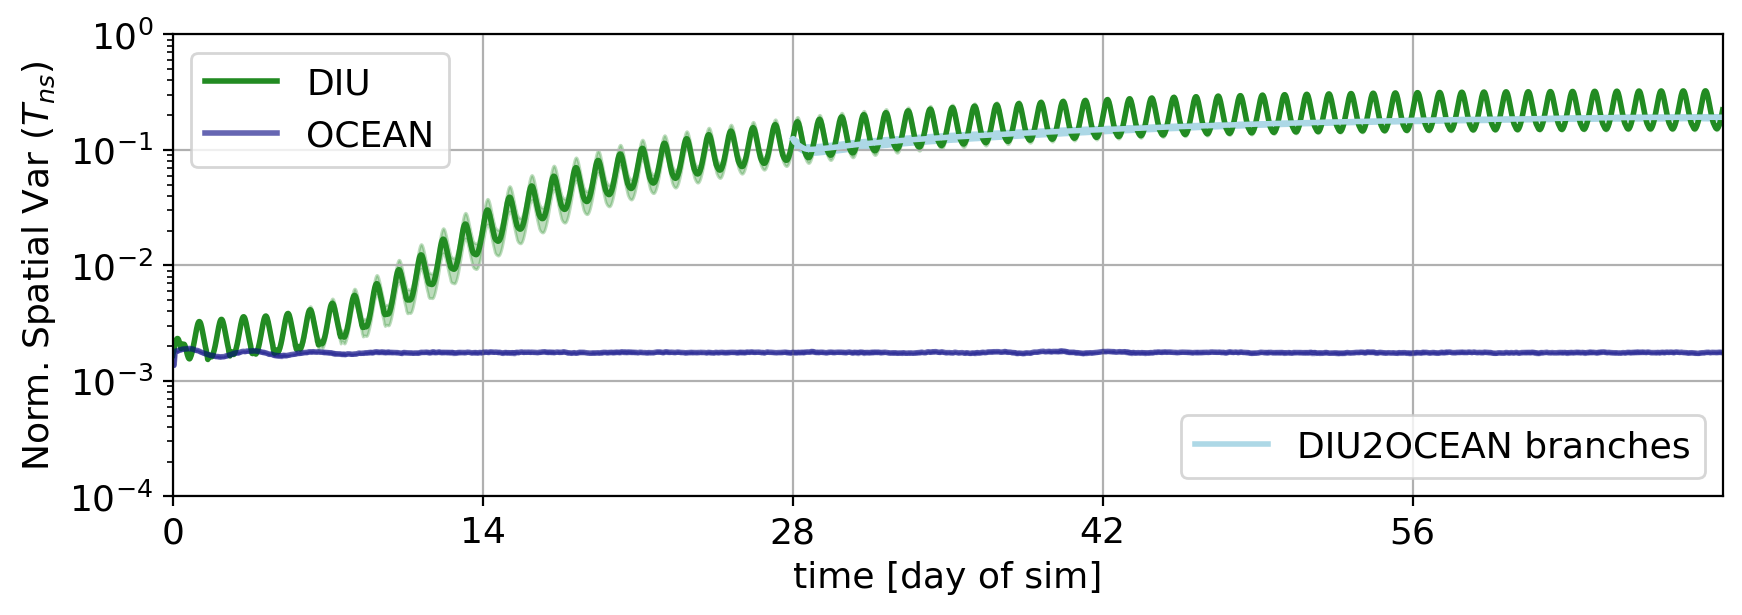

In [98]:
def plot_branches_all_spread(diu, diu_std, ocean, ocean_std, branch1, branch1_std, branch2, branch2_std, name,
    days1,days2,daybranch1, daybranch2, spread='no',log='no'):
    var = diu
    std = diu_std
    var_ocean = ocean
    std_ocean = ocean_std
    daybranch1= daybranch1
    daybranch2= daybranch2
    var_ocA1 = branch1
    std_ocA1 = branch1_std
    var_ocA2 = branch2
    std_ocA2 = branch2_std
    ylabel = str(name)
    
    fig, ax= plt.subplots(figsize=(10,3), dpi=200)
    var_ocA2[0]=var[daybranch2]
    p1, = plt.plot(np.linspace(0,days1+days2,len(var)),var,color='forestgreen', label='DIU',linewidth=2, alpha=1)
    p0, = plt.plot(np.linspace(0,days1+days2,len(var_ocean)),var_ocean, color='navy', linewidth=2, alpha=0.6, label='OCEAN')
    #p2, = plt.plot(np.linspace(daybranch1,daybranch1+days2,len(var_ocA1)-1),var_ocA1[1:],color='dodgerblue', label='OCEAN branch 1',linewidth=0.5)
    p3, = plt.plot(np.linspace(daybranch2,daybranch2+days2,len(var_ocA2)-1),var_ocA2[1:],color='lightblue', label='OCEAN branch 2',linewidth=2)
    
    l1 = plt.legend([p1,p0], ['DIU','OCEAN'], loc=2)
    l2 = plt.legend([p3], ['DIU2OCEAN branches'], loc=4)
    if spread=='yes':
        p1 = plt.fill_between(np.linspace(0,days1+days2,len(var)), (var-std), (var+std), color='forestgreen', alpha=.3)
        p0 = plt.fill_between(np.linspace(0,days1+days2,len(var_ocean)), (var_ocean-std_ocean), (var_ocean+std_ocean), color='navy', alpha=.3)
     #   p2 = plt.fill_between(np.linspace(daybranch1,daybranch1+days2,len(var_ocA1)-1), (var_ocA1-std_ocA1)[1:], (var_ocA1+std_ocA1)[1:], color='dodgerblue', alpha=.1)
        p3 = plt.fill_between(np.linspace(daybranch2,daybranch2+days2,len(var_ocA2)-1), (var_ocA2-std_ocA2)[1:], (var_ocA2+std_ocA2)[1:], color='lightblue', alpha=1)
        
    plt.title('')
    plt.xlabel('time [day of sim]')
    plt.ylabel(ylabel)
    if log=='yes':
        plt.yticks(np.linspace(-4,0,3))
        plt.ylim((1e-4,1e0))
        plt.yscale('log')
    plt.xticks(np.arange(0,70,14))
    plt.xlim(0,70)

    plt.grid()
    plt.gca().add_artist(l1)
    plt.show()
    return




plot_branches_all_spread(diu_var[::], diu_var_std[::], ocean_var[::], ocean_var_std[::], branch1_var[::], branch1_var_std[::], branch2_var[::], branch2_var_std[::], 
                         'Norm. Spatial Var ($T_{ns})$', days1, days2, daybranch1=daybranch1, daybranch2=daybranch2, spread='yes', log='yes')



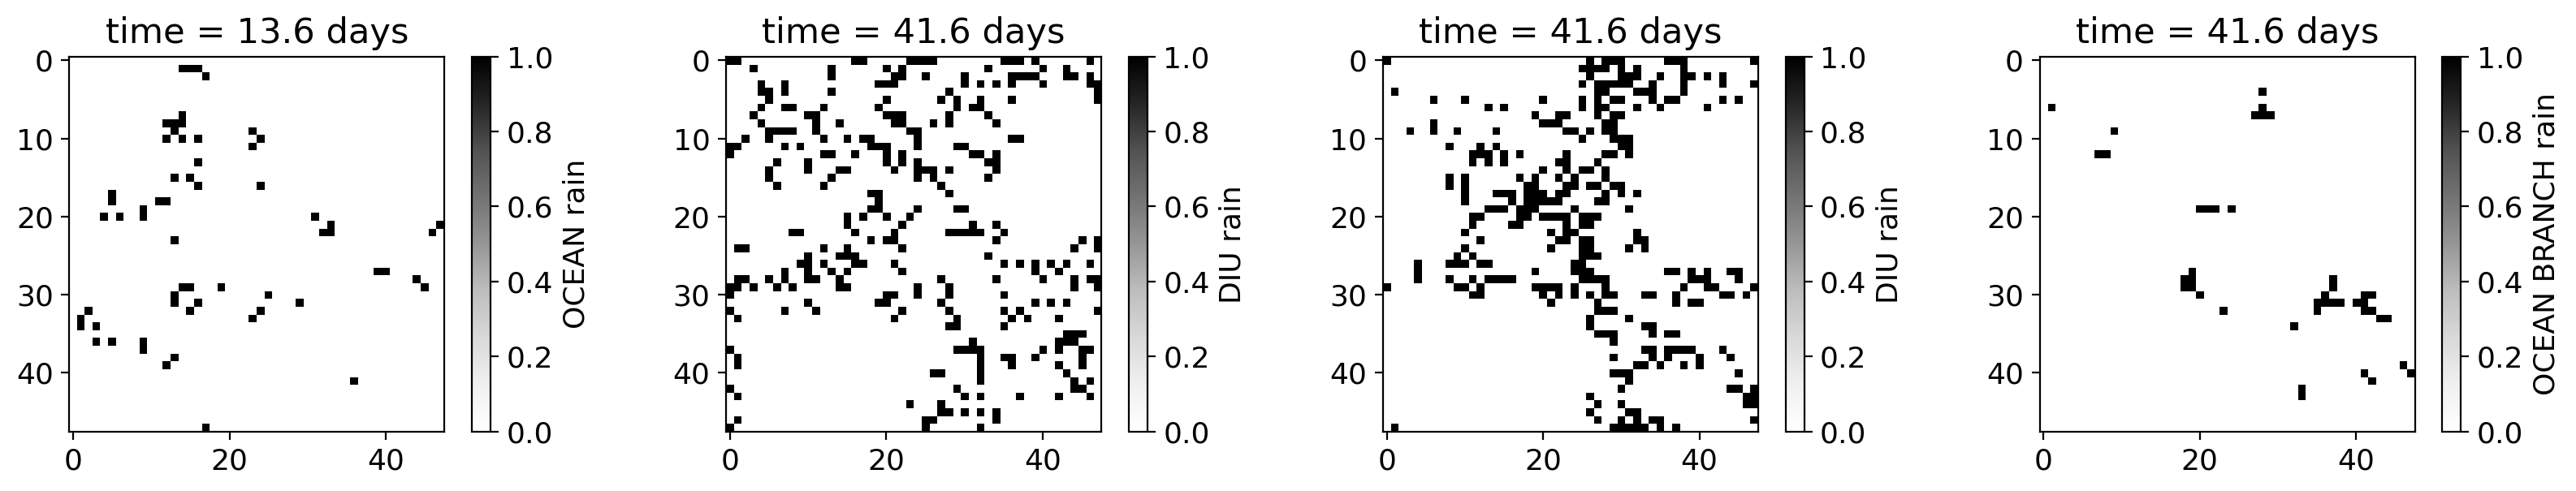

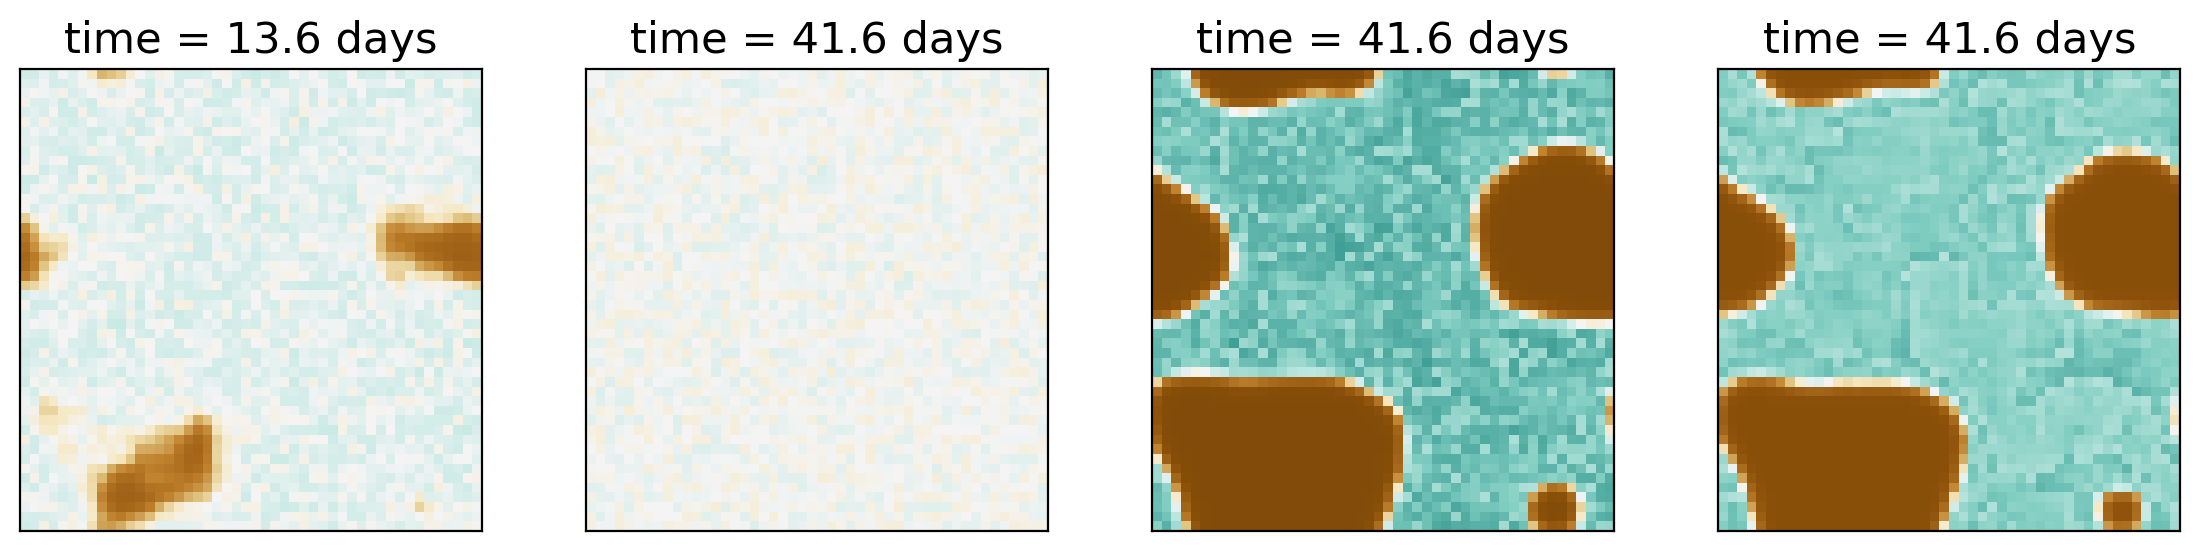

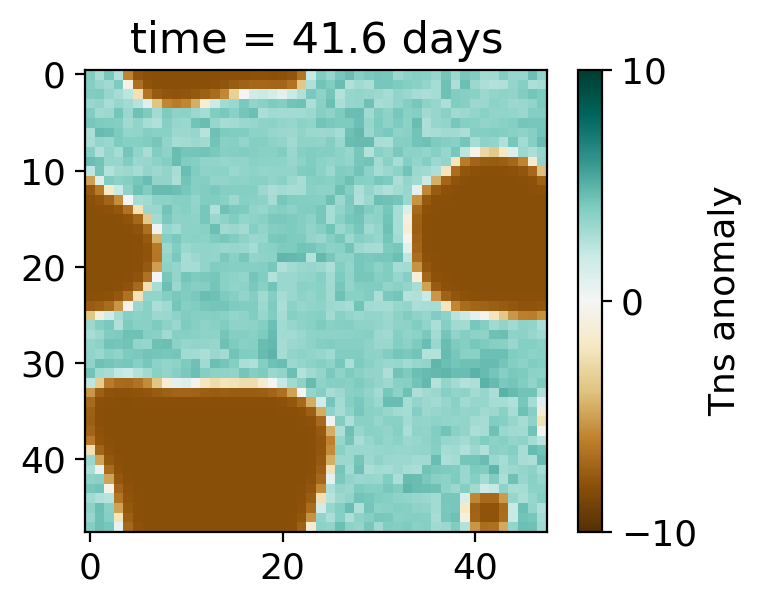

In [88]:
def plot_snapshots(x,Tns,x_ocean,Tns_ocean,x_oceanBRANCH2,Tns_oceanBRANCH2,
    daybranch2, plotdayOCEAN, plotdayDIU, plotdayBRANCH2, plotdayDIU_2):
    fig = plt.figure(figsize=(20,3), dpi=200)
    vmin=0.5
    vmax=0.55
    plt.rcParams.update({'font.size': 13})

    ax1 = plt.subplot(141)
    ax1.set_title('time = %i'% plotdayDIU +'.6 days')
    ax2 = plt.subplot(142)
    ax2.set_title('time = %i'% plotdayOCEAN +'.6 days')

    ax3 = plt.subplot(143)
    ax3.set_title('time = %i'% plotdayDIU_2 +'.6 days')
    ax4 = plt.subplot(144)
    ax4.set_title('time = %i'% plotdayBRANCH2 +'.6 days')
    
    
    im1 = ax2.imshow(x[plotdayDIU*48+30], cmap='Greys')
    im2 = ax1.imshow(x_ocean[plotdayOCEAN*48+30], cmap='Greys')
    im3 = ax3.imshow(x[plotdayDIU_2*48+30], cmap='Greys')
    im4 = ax4.imshow(x_oceanBRANCH2[(plotdayBRANCH2-daybranch2)*48+30],cmap='Greys')
    fig.colorbar(im1, ax=ax1, orientation='vertical', label='OCEAN rain')
    fig.colorbar(im2, ax=ax2, orientation='vertical', label='DIU rain')
    fig.colorbar(im3, ax=ax3, orientation='vertical', label='DIU rain')
    fig.colorbar(im4, ax=ax4, orientation='vertical', label='OCEAN BRANCH rain')
    plt.show()


    cps = Tns[:] - np.mean(Tns,axis=(1,2))[:,None,None]
    cps_ocean = Tns_ocean[:] - np.mean(Tns_ocean,axis=(1,2))[:,None,None]
    cps_oceanBRANCH2 = Tns_oceanBRANCH2[:] - np.mean(Tns_oceanBRANCH2,axis=(1,2))[:,None,None]

    fig = plt.figure(figsize=(14,3), dpi=200)
    vmin=0.5
    vmax=0.55

    ax1 = plt.subplot(141)
    ax1.set_title('time = %i'% plotdayDIU +'.6 days')
    ax2 = plt.subplot(142)
    ax2.set_title('time = %i'% plotdayOCEAN +'.6 days')
    ax3 = plt.subplot(143)
    ax3.set_title('time = %i'% plotdayDIU_2 +'.6 days')
    ax4 = plt.subplot(144)
    ax4.set_title('time = %i'% plotdayBRANCH2 +'.6 days')
    
    vmin=-10
    vmax=10
    im1 = ax1.imshow(20*cps[plotdayDIU*48+30], cmap='BrBG',vmin=vmin, vmax=vmax)
    im2 = ax2.imshow(20*cps_ocean[plotdayOCEAN*48+30], cmap='BrBG', vmin=vmin, vmax=vmax)
    im3 = ax3.imshow(20*cps[plotdayDIU_2*48+30],cmap='BrBG',vmin=vmin, vmax=vmax)
    im4 = ax4.imshow(20*cps_oceanBRANCH2[(plotdayBRANCH2-daybranch2)*48+30],cmap='BrBG',vmin=vmin, vmax=vmax)
    #im4 = ax4.imshow(20*cps[41*48+30], cmap='BrBG' ,vmin=-15, vmax=15)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax4.set_xticks([])
    ax4.set_yticks([])
    #fig.colorbar(im1, ax=ax1, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])
    #fig.colorbar(im2, ax=ax2, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])
    #fig.colorbar(im3, ax=ax3, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])
    #fig.colorbar(im4, ax=ax4, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])
    
    fig = plt.figure(figsize=(4,3), dpi=200)
    vmin=0.5
    vmax=0.55

    
    ax4 = plt.subplot(111)
    ax4.set_title('time = %i'% plotdayBRANCH2 +'.6 days')

    
    im4 = ax4.imshow(20*cps_oceanBRANCH2[(plotdayBRANCH2-daybranch2)*48+30],cmap='BrBG',vmin=-10, vmax=10)
    #im4 = ax4.imshow(20*cps[41*48+30], cmap='BrBG' ,vmin=-15, vmax=15)
    
    fig.colorbar(im4, ax=ax4, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])
    
    plt.show()
    return


plotdayOCEAN = 41
plotdayDIU = 13
plotdayBRANCH2 = 41
plotdayDIU_2 = 41


plot_snapshots(x,Tns,
               x_ocean,Tns_ocean,
               x_oceanBRANCH2,Tns_oceanBRANCH2, 
               daybranch2,
               plotdayOCEAN, plotdayDIU, 
               plotdayBRANCH2, plotdayDIU_2)
#fig.colorbar(plt.imshow(20*cps_oceanBRANCH2[(plotdayBRANCH2-daybranch2)*48+30],cmap='BrBG',vmin=-10, vmax=10), ax=ax4, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])